# NFL Team Stats Data Analysis (2003-2023)

Dataset: Information from Kaggle about basic team stats for the previous 20 regular seasons.

Business Understanding/Goal: Get some information on NFL trends!

## 1. Import Libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 200)

## 2. Load the Dataset

In [243]:
df = pd.read_csv("data/nfldata.csv")

## 3. Understand the Data

In [244]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  672 non-null    int64  
 1   team                  672 non-null    object 
 2   wins                  672 non-null    int64  
 3   losses                672 non-null    int64  
 4   win_loss_perc         672 non-null    float64
 5   points                672 non-null    int64  
 6   points_opp            672 non-null    int64  
 7   points_diff           672 non-null    int64  
 8   mov                   352 non-null    float64
 9   g                     672 non-null    int64  
 10  total_yards           672 non-null    int64  
 11  plays_offense         672 non-null    int64  
 12  yds_per_play_offense  672 non-null    float64
 13  turnovers             672 non-null    int64  
 14  fumbles_lost          672 non-null    int64  
 15  first_down            6

Columns that look useful:
* year, team, wins, losses, win_loss_perc, points_diff, mov, total_yards, yds_per_play_offense, turnovers, penalties, penalties_yds


From this info, I could learn many things, specifically about:
* Winning numbers and percentages
* Correlations between yards and points
* Correlations between penalties and losses
* Stats for a specific team or season

In [245]:
# Other useful functions for understanding the data
df.head(32)
# df.describe()
# df.columns

,year,team,wins,losses,win_loss_perc,points,points_opp,points_diff,mov,g,total_yards,plays_offense,yds_per_play_offense,turnovers,fumbles_lost,first_down,pass_cmp,pass_att,pass_yds,pass_td,pass_int,pass_net_yds_per_att,pass_fd,rush_att,rush_yds,rush_td,rush_yds_per_att,rush_fd,penalties,penalties_yds,pen_fd,score_pct,turnover_pct,exp_pts_tot,ties
0,2003,New England Patriots,14,2,0.875,348,238,110,6.9,16,5039,1042,4.8,24,11,294,320,537,3432,23,13,6.0,177,473,1607,9,3.4,91,111,998,26,27.9,11.3,-136.51,NaN
1,2003,Miami Dolphins,10,6,0.625,311,261,50,3.1,16,4609,968,4.8,34,15,266,257,450,2792,17,19,5.8,145,487,1817,14,3.7,99,103,913,22,28.1,17.2,-177.92,NaN
2,2003,Buffalo Bills,6,10,0.375,243,279,-36,-2.3,16,4348,980,4.4,34,17,268,293,502,2684,11,17,4.9,150,427,1664,13,3.9,96,106,891,22,21.9,17.6,-230.07,NaN
3,2003,New York Jets,6,10,0.375,283,299,-16,-1.0,16,4951,936,5.3,20,6,274,312,496,3316,20,14,6.3,181,409,1635,8,4.0,78,69,550,15,32.4,11.8,-107.89,NaN
4,2003,Baltimore Ravens,10,6,0.625,391,281,110,6.9,16,4929,1009,4.9,38,19,259,217,415,2255,16,19,4.9,121,552,2674,18,4.8,115,126,970,23,31.8,16.6,-220.50,NaN
5,2003,Cincinnati Bengals,8,8,0.500,346,384,-38,-2.4,16,5329,1038,5.1,22,7,313,324,520,3342,26,15,6.0,181,481,1987,12,4.1,101,107,846,31,33.3,11.1,-78.22,NaN
6,2003,Pittsburgh Steelers,6,10,0.375,300,327,-27,-1.7,16,4792,1020,4.7,28,11,275,306,532,3304,19,17,5.8,174,446,1488,10,3.3,77,111,1005,24,27.1,13.5,-166.93,NaN
7,2003,Cleveland Browns,5,11,0.313,254,322,-68,-4.3,16,4504,961,4.7,33,15,276,313,509,2834,17,18,5.2,153,412,1670,8,4.1,91,98,767,32,26.7,17.2,-191.88,NaN
8,2003,Indianapolis Colts,12,4,0.750,447,336,111,6.9,16,5874,1041,5.6,20,10,348,381,569,4179,29,10,7.1,212,453,1695,16,3.7,104,92,662,32,46.3,10.2,-13.96,NaN
9,2003,Tennessee Titans,12,4,0.750,435,324,111,6.9,16,5501,1013,5.4,21,12,310,315,502,3878,30,9,7.4,211,486,1623,11,3.3,84,110,887,15,39.4,9.6,-103.79,NaN


## 4. Data Processing/Preparation

### 4.1. Dropping Unnecessary Columns

In [246]:
df.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points',
       'points_opp', 'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties'],
      dtype='object')

In [247]:
df.shape

(672, 35)

In [248]:
df = df[['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points_diff', 'mov', 'total_yards',
       'yds_per_play_offense', 'turnovers', 'penalties', 'penalties_yds']]

df.shape

(672, 12)

### 4.2. Checking for Duplicates

In [249]:
df.duplicated().sum()

# It's not necesary to check for duplicated names in the data, 
# since teams will have the same name from season to season!

0

### 4.3. Checking for Null Values

In [250]:
df.isna().sum() / df.shape[0]

# No strings in the data except for team name which is needed, so no string formatting

year                    0.00000
team                    0.00000
wins                    0.00000
losses                  0.00000
win_loss_perc           0.00000
points_diff             0.00000
mov                     0.47619
total_yards             0.00000
yds_per_play_offense    0.00000
turnovers               0.00000
penalties               0.00000
penalties_yds           0.00000
dtype: float64

## 5. Univariate Analysis

In [251]:
df.columns

Index(['year', 'team', 'wins', 'losses', 'win_loss_perc', 'points_diff', 'mov',
       'total_yards', 'yds_per_play_offense', 'turnovers', 'penalties',
       'penalties_yds'],
      dtype='object')

### 5.1. Numerical Data

<Axes: xlabel='wins'>

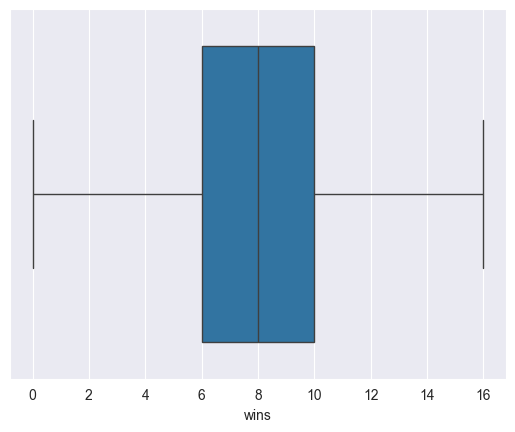

In [252]:
# Wins
sns.boxplot(data=df, x="wins")

<Axes: xlabel='losses'>

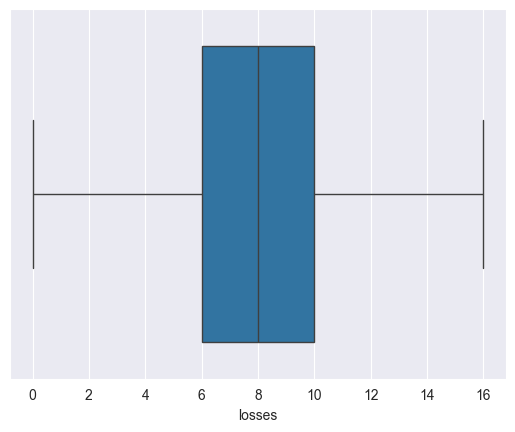

In [253]:
# Losses
sns.boxplot(data=df, x="losses")

<Axes: title={'center': 'Total Yards in a Season'}, xlabel='total_yards', ylabel='Count'>

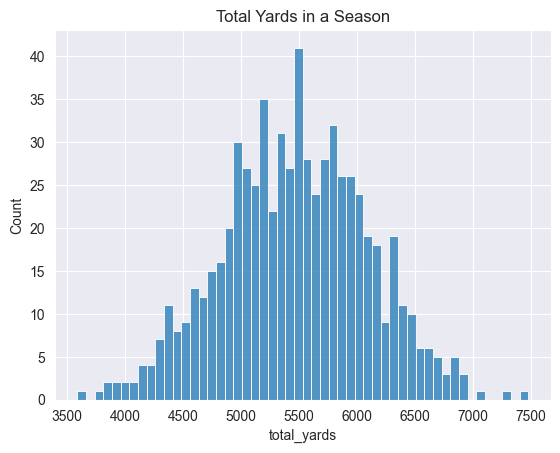

In [254]:
plt.title("Total Yards in a Season")
sns.histplot(data=df, x="total_yards", binwidth=75)

### 5.2. Description of Data

In [255]:
# Description of wins
df.groupby(["team"])[["wins"]].describe()

wins                                                \
                         count       mean       std  min    25%   50%    75%   
team                                                                           
Arizona Cardinals         21.0   7.095238  2.808999  3.0   5.00   7.0   9.00   
Atlanta Falcons           21.0   8.047619  2.765433  4.0   7.00   7.0  10.00   
Baltimore Ravens          21.0   9.666667  2.476557  5.0   8.00  10.0  11.00   
Buffalo Bills             21.0   7.904762  2.527939  4.0   6.00   7.0   9.00   
Carolina Panthers         21.0   7.666667  3.306559  2.0   6.00   7.0  11.00   
Chicago Bears             21.0   7.571429  2.730777  3.0   6.00   7.0   9.00   
Cincinnati Bengals        21.0   8.000000  2.846050  2.0   6.00   8.0  10.00   
Cleveland Browns          21.0   5.571429  2.856071  0.0   4.00   5.0   7.00   
Dallas Cowboys            21.0   9.285714  2.532644  4.0   8.00   9.0  12.00   
Denver Broncos            21.0   8.523810  2.839349  4.0   7.00   8.0  10.00   
Detroit Lions             21.0   6.142857  3.102994  0.0   4.00   6.0   9.00   
Green Bay Packers         21.0   9.857143  2.797958  4.0   8.00  10.0  12.00   
Houston Texans            21.0   7.047619  3.040990  2.0   4.00   8.0   9.00   
Indianapolis Colts        21.0   9.714286  3.273268  2.0   8.00  11.0  12.00   
Jacksonville Jaguars      21.0   6.190476  3.076021  1.0   4.00   5.0   9.00   
Kansas City Chiefs        21.0   9.333333  3.678768  2.0   7.00  10.0  12.00   
Las Vegas Raiders          4.0   8.000000  1.632993  6.0   7.50   8.0   8.50   
Los Angeles Chargers       7.0   8.142857  2.609506  5.0   6.00   9.0   9.50   
Los Angeles Rams           8.0   9.250000  3.195980  4.0   8.00  10.0  11.25   
Miami Dolphins            21.0   7.476190  2.462094  1.0   6.00   7.0   9.00   
Minnesota Vikings         21.0   8.476190  2.542028  3.0   7.00   8.0  10.00   
New England Patriots      21.0  11.476190  2.713283  4.0  10.00  12.0  13.00   
New Orleans Saints        21.0   9.238095  2.718543  3.0   7.00   9.0  11.00   
New York Giants           21.0   7.333333  2.633122  3.0   6.00   7.0   9.00   
New York Jets             21.0   6.666667  2.556039  2.0   4.00   7.0   9.00   
Oakland Raiders           17.0   5.411765  2.399448  2.0   4.00   5.0   7.00   
Philadelphia Eagles       21.0   9.238095  2.700088  4.0   8.00   9.0  11.00   
Pittsburgh Steelers       21.0  10.142857  2.104417  6.0   9.00  10.0  12.00   
San Diego Chargers        14.0   8.714286  3.099096  4.0   7.25   9.0  10.50   
San Francisco 49ers       21.0   7.666667  3.568380  2.0   5.00   7.0  11.00   
Seattle Seahawks          21.0   9.380952  2.376472  4.0   9.00  10.0  11.00   
St. Louis Rams            13.0   5.846154  3.078045  1.0   3.00   7.0   7.00   
Tampa Bay Buccaneers      21.0   7.047619  2.957637  2.0   5.00   7.0   9.00   
Tennessee Titans          21.0   7.857143  2.954416  2.0   6.00   8.0   9.00   
Washington Commanders      2.0   6.000000  2.828427  4.0   5.00   6.0   7.00   
Washington Football Team   2.0   7.000000  0.000000  7.0   7.00   7.0   7.00   
Washington Redskins       17.0   6.411765  2.319990  3.0   5.00   6.0   8.00   

                                
                           max  
team                            
Arizona Cardinals         13.0  
Atlanta Falcons           13.0  
Baltimore Ravens          14.0  
Buffalo Bills             13.0  
Carolina Panthers         15.0  
Chicago Bears             13.0  
Cincinnati Bengals        12.0  
Cleveland Browns          11.0  
Dallas Cowboys            13.0  
Denver Broncos            13.0  
Detroit Lions             12.0  
Green Bay Packers         15.0  
Houston Texans            12.0  
Indianapolis Colts        14.0  
Jacksonville Jaguars      12.0  
Kansas City Chiefs        14.0  
Las Vegas Raiders         10.0  
Los Angeles Chargers      12.0  
Los Angeles Rams          13.0  
Miami Dolphins            11.0  
Minnesota Vikings         13.0  
New England Patriots      16.0  


### 5.3. Multiple Plots
(Don't have Categorical Data - no strings)

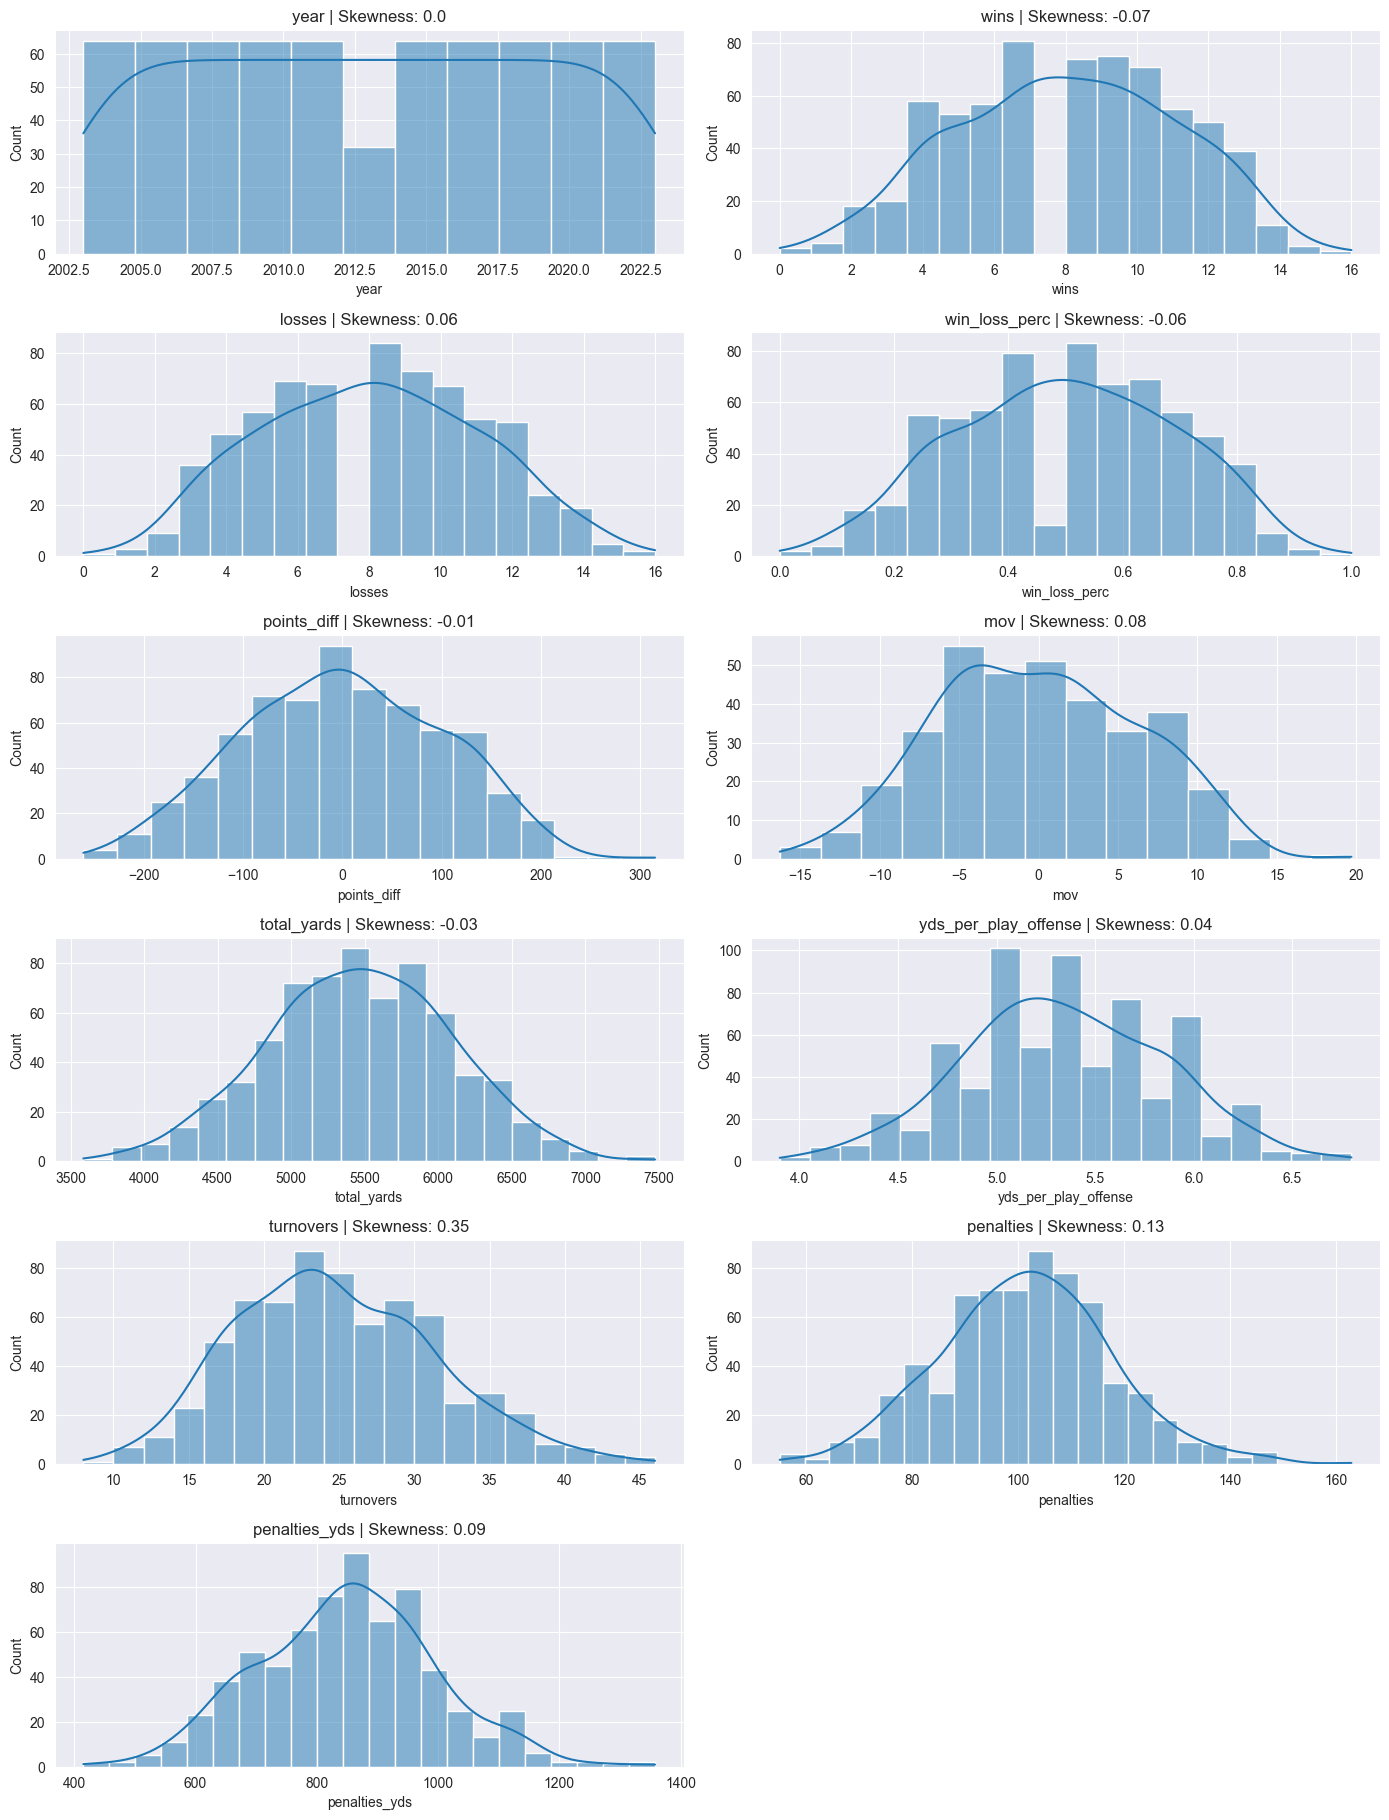

In [256]:
# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes("number").columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
	plt.subplot(len(numerical_columns), 2, idx)
	
	# Kernel density plot
	sns.histplot(df[feature], kde=True)
	plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

## 6. Multivariate Analysis

### 6.1. Scatter Plots

#### 6.1.1. Two Numerical Values

Text(0.5, 1.0, 'Turnovers vs Losses: 2003-2023 NFL Seasons')

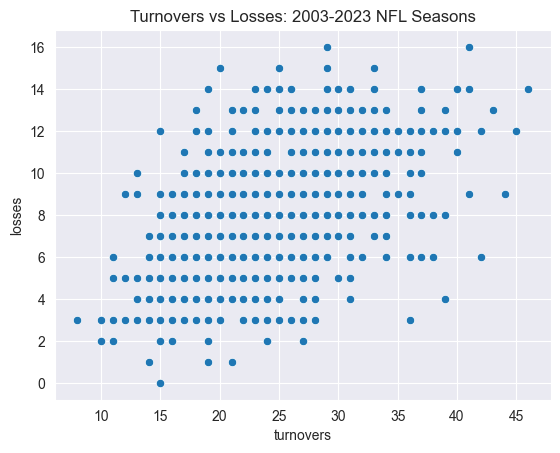

In [257]:
sns.scatterplot(data=df, x="turnovers", y="losses")
plt.title("Turnovers vs Losses: 2003-2023 NFL Seasons")

Text(0.5, 1.0, 'Yards From Penalties: 2003-2023 NFL Seasons')

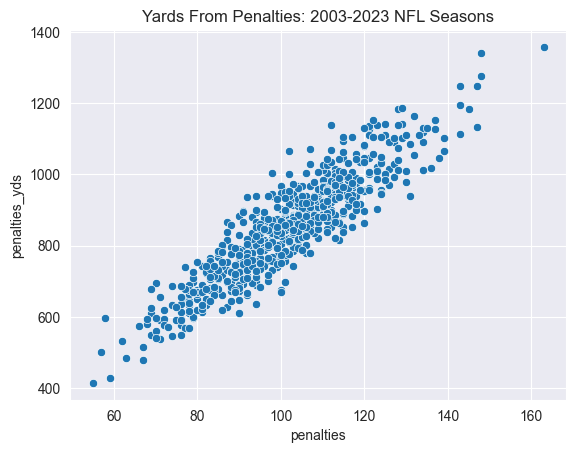

In [258]:
sns.scatterplot(data=df, x="penalties", y="penalties_yds")
plt.title("Yards From Penalties: 2003-2023 NFL Seasons")

#### 6.1.2. Three Numerical Values

Text(0.5, 1.0, 'Total Yards vs Wins: 2003-2023 NFL Seasons')

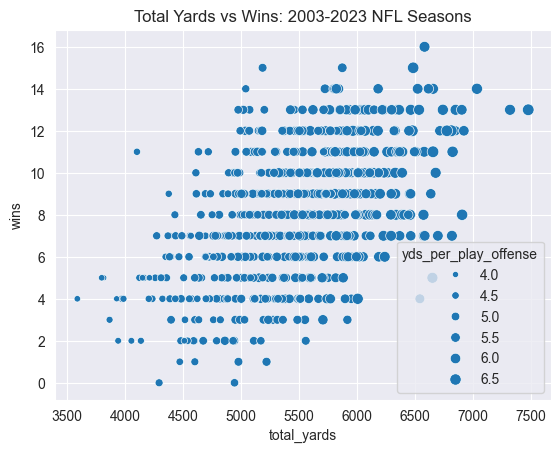

In [259]:
sns.scatterplot(data=df, x="total_yards", y="wins", size="yds_per_play_offense")
plt.title("Total Yards vs Wins: 2003-2023 NFL Seasons")

Text(0.5, 1.0, 'Total Yards vs Point Differentials: 2003-2023 NFL Seasons')

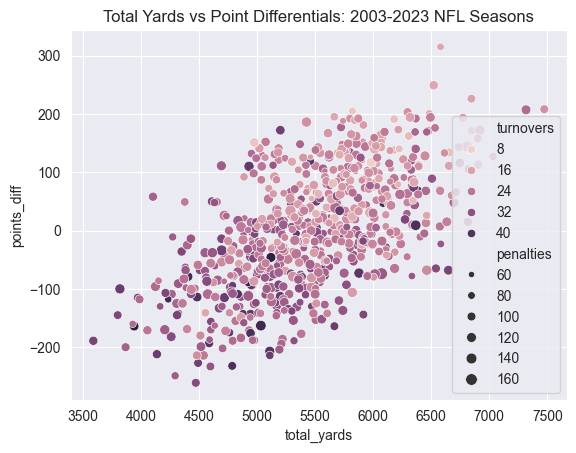

In [260]:
sns.scatterplot(data=df, x="total_yards", y="points_diff", size="penalties", hue="turnovers")
plt.title("Total Yards vs Point Differentials: 2003-2023 NFL Seasons")

## 7. Statistical Analysis

### How does the number of losses correlate with the number of turnovers a team has in a given season? Could the losses also be influenced by other, more likely factors?

Text(0.5, 1.0, 'Turnovers vs Losses: 2003-2023 NFL Seasons')

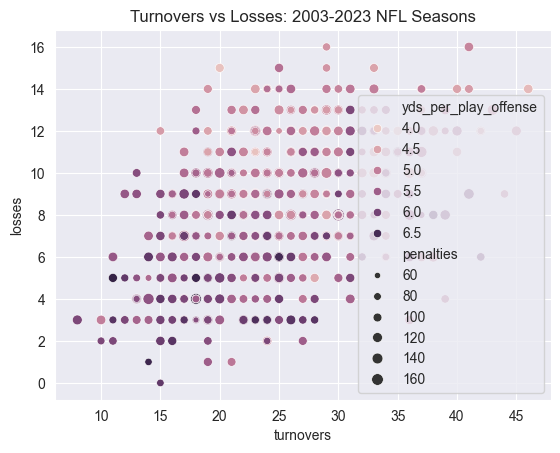

In [261]:
sns.scatterplot(data=df, x="turnovers", y="losses", size="penalties", hue="yds_per_play_offense")
plt.title("Turnovers vs Losses: 2003-2023 NFL Seasons")

We can see an albeit very broad increase in losses when turnovers are inreased, as the general trendline has a positive slope. However, we can also see that yards per play seems to decrease when losses increase, suggesting that yards per play is also a big indicator of success in the NFL. However, penalties seem to be less indicative, since a trend relating to losses cannot be clearly tracked in this graph.

### Who was the most winningest team since 2017?


In [262]:
# List of total wins for each team since 2017
df.loc[df['year'] > 2016].groupby(by='team')["wins"].sum()


team
Arizona Cardinals           43
Atlanta Falcons             49
Baltimore Ravens            75
Buffalo Bills               73
Carolina Panthers           42
Chicago Bears               49
Cincinnati Bengals          50
Cleveland Browns            50
Dallas Cowboys              69
Denver Broncos              43
Detroit Lions               47
Green Bay Packers           69
Houston Texans              46
Indianapolis Colts          54
Jacksonville Jaguars        43
Kansas City Chiefs          85
Las Vegas Raiders           32
Los Angeles Chargers        57
Los Angeles Rams            70
Miami Dolphins              57
Minnesota Vikings           66
New England Patriots        65
New Orleans Saints          74
New York Giants             37
New York Jets               36
Oakland Raiders             17
Philadelphia Eagles         69
Pittsburgh Steelers         70
San Francisco 49ers         64
Seattle Seahawks            67
Tampa Bay Buccaneers        58
Tennessee Titans            63
Was

In [263]:
# The greatest number of wins a team had since 2017
df.loc[df['year'] > 2016].groupby(by='team')["wins"].sum().max()

85

In [264]:
# The team with the greteast number of wins since 2017
df.loc[df['year'] > 2016].groupby(by='team')["wins"].sum().idxmax()

'Kansas City Chiefs'

### Who had the most yards per play this season?

In [265]:
# List of yards per play for each team this season
df.loc[df['year'] > 2022].groupby(by='team')["yds_per_play_offense"].sum()

team
Arizona Cardinals        5.2
Atlanta Falcons          5.2
Baltimore Ravens         5.9
Buffalo Bills            5.7
Carolina Panthers        4.1
Chicago Bears            5.0
Cincinnati Bengals       5.2
Cleveland Browns         4.8
Dallas Cowboys           5.6
Denver Broncos           5.0
Detroit Lions            5.9
Green Bay Packers        5.6
Houston Texans           5.4
Indianapolis Colts       5.2
Jacksonville Jaguars     5.2
Kansas City Chiefs       5.5
Las Vegas Raiders        4.9
Los Angeles Chargers     5.1
Los Angeles Rams         5.6
Miami Dolphins           6.5
Minnesota Vikings        5.5
New England Patriots     4.6
New Orleans Saints       5.1
New York Giants          4.5
New York Jets            4.3
Philadelphia Eagles      5.4
Pittsburgh Steelers      5.0
San Francisco 49ers      6.6
Seattle Seahawks         5.5
Tampa Bay Buccaneers     5.1
Tennessee Titans         4.9
Washington Commanders    5.0
Name: yds_per_play_offense, dtype: float64

In [266]:
# The highest yards per play a team had this year
df.loc[df['year'] > 2022].groupby(by='team')["yds_per_play_offense"].sum().max()

6.6

In [267]:
# The team with the highest yards per play a team had this year
df.loc[df['year'] > 2022].groupby(by='team')["yds_per_play_offense"].sum().idxmax()

'San Francisco 49ers'

## 8. Future Steps

With this dataset, I hope that I will be able to:
* Be more informed for the game this Sunday!
* Maybe train a model that takes in some stats and spits out a rough game prediction.
* Could also be useful data for coaches or anyone trying to learn how to improve at football.